# Melbourne Airbnb listing price prediction - Preprocessing

The aim of this project is to predict the price of Melbourne Airbnb accomodation listings. The dataset can be downloaded from [Kaggle](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data). We will also use a csv file containing scraped data on suburb ranking (uploaded via canvas). In this notebook, we perform all the necessary preprocessing steps like cleaning,addressing missing values, removing outliers, feature engineering, visualization and feature selection. The final preprocessed dataset will be stored in a csv file to be used for prediction modelling. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read csv as dataframe
df = pd.read_csv('cleansed_listings_dec18.csv', low_memory=False)
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,...,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,2.018120e+13,12/7/2018,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,...,9.0,9.0,f,NaN,f,strict_14_with_grace_period,f,f,1,0.04
1,10803,https://www.airbnb.com/rooms/10803,2.018120e+13,12/7/2018,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,...,9.0,9.0,f,NaN,t,moderate,t,t,1,1.50


In [3]:
df.shape

(22895, 84)

In [4]:
#view column names
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighborhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 

## 1.  Processing Numerical features - missing values, outliers

In [5]:
#drop irrelevant columns
columns_to_keep = ['host_since', 'host_response_rate', 'host_is_superhost','suburb','zipcode','latitude', 'longitude','property_type',
                   'room_type', 'accommodates','bathrooms', 'bedrooms', 'amenities', 
                   'security_deposit','cleaning_fee','price','number_of_reviews','guests_included','minimum_nights','maximum_nights', 'review_scores_rating',
       'cancellation_policy']

In [6]:
df = df[columns_to_keep]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 22 columns):
host_since              22892 non-null object
host_response_rate      15589 non-null object
host_is_superhost       22892 non-null object
suburb                  22872 non-null object
zipcode                 22753 non-null object
latitude                22895 non-null float64
longitude               22895 non-null float64
property_type           22895 non-null object
room_type               22895 non-null object
accommodates            22895 non-null int64
bathrooms               22878 non-null float64
bedrooms                22890 non-null float64
amenities               22895 non-null object
security_deposit        15401 non-null float64
cleaning_fee            17249 non-null float64
price                   22895 non-null int64
number_of_reviews       22895 non-null int64
guests_included         22895 non-null int64
minimum_nights          22895 non-null int64
maximum_nights  

There are 22895 rows in the dataset. Some columns have missing entries that will be imputed in a later section. Also, a few columns that should have numeric values will be converted to type 'float' or 'int' as appropriate. Columns that represent categorical values will also be change to type 'category'. Column 'host_since' will be converted to datetime. 

In [7]:
#view first few values of column 'host_response_rate'
df['host_response_rate'].head()

0      0%
1     NaN
2    100%
3     NaN
4    100%
Name: host_response_rate, dtype: object

In [8]:
#remove '%' from str and change column type to 'float'
df['host_response_rate'] = df['host_response_rate'].astype('str')
df['host_response_rate'] = df['host_response_rate'].apply(lambda x: x[:-1] if x != 'NaN' else x)
df['host_response_rate'].replace('na',np.nan,inplace=True)
df['host_response_rate'] = df['host_response_rate'].astype('float')
df['host_response_rate'].head(5)

0      0.0
1      NaN
2    100.0
3      NaN
4    100.0
Name: host_response_rate, dtype: float64

In [9]:
#impute median values in columns containing missing entries
columns_to_impute = ['host_response_rate','security_deposit','cleaning_fee','review_scores_rating']
df[columns_to_impute] = df[columns_to_impute].fillna(df[columns_to_impute].median())

In [10]:
#view descriptive statistics
df.describe()

,host_response_rate,latitude,longitude,accommodates,bathrooms,bedrooms,security_deposit,cleaning_fee,price,number_of_reviews,guests_included,minimum_nights,maximum_nights,review_scores_rating
count,22895.000000,22895.000000,22895.000000,22895.000000,22878.000000,22890.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,2.289500e+04,22895.000000
mean,96.665516,-37.826827,145.008457,3.435554,1.291590,1.527741,278.419961,64.078751,148.004368,21.266477,1.797467,4.059314,5.141727e+03,94.884909
std,13.328828,0.066747,0.127711,2.228580,0.579754,0.948241,396.787930,50.384417,210.883253,39.013606,1.427094,25.883257,6.609042e+05,7.522819
min,0.000000,-38.224427,144.484326,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+00,20.000000
25%,100.000000,-37.852665,144.957692,2.000000,1.000000,1.000000,200.000000,35.000000,71.000000,1.000000,1.000000,1.000000,5.900000e+01,94.000000
50%,100.000000,-37.817855,144.978402,2.000000,1.000000,1.000000,200.000000,59.000000,111.000000,5.000000,1.000000,2.000000,1.125000e+03,97.000000
75%,100.000000,-37.803176,145.013441,4.000000,1.500000,2.000000,300.000000,79.000000,165.000000,23.500000,2.000000,3.000000,1.125000e+03,99.000000
max,100.000000,-37.482595,145.839127,16.000000,14.000000,16.000000,6950.000000,867.000000,12624.000000,538.000000,16.000000,1125.000000,1.000000e+08,100.000000


### Removing outliers from numerical columns
Each feature showing significant outliers using descriptive statistics will be examined by plotting its histogram and outliers will be removed by filtering the dataset.

Text(0.5, 1.0, 'Fig.1 : Histogram of accommodates')

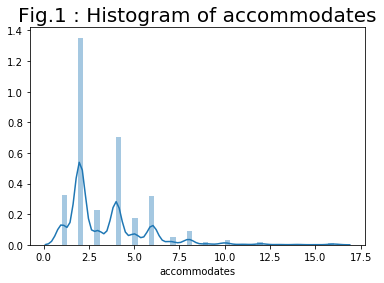

In [11]:
#view histogram for accommodates
ax=sns.distplot(df['accommodates'])
ax.set_title('Fig.1 : Histogram of accommodates', fontsize=20)

In [12]:
#filter dataframe to remove outliers
df = df[df['accommodates']<10]

Text(0.5, 1.0, 'Fig.2 : Histogram of bathrooms')

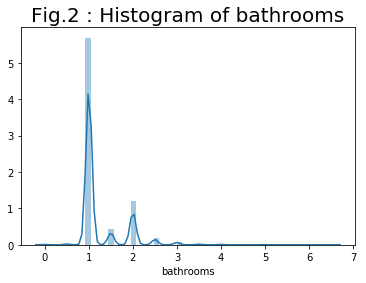

In [13]:
#view histogram for bathrooms
ax=sns.distplot(df['bathrooms'])
ax.set_title('Fig.2 : Histogram of bathrooms', fontsize=20)

In [14]:
#filter dataset to remove outliers
df = df[df['bathrooms']<5]

Text(0.5, 1.0, 'Fig.3 : Histogram of bedrooms')

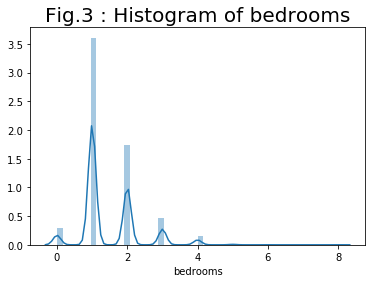

In [15]:
#view histogram for bedrooms
ax=sns.distplot(df['bedrooms'])
ax.set_title('Fig.3 : Histogram of bedrooms', fontsize=20)

In [16]:
#filter dataset to remove outliers
df = df[df['bedrooms']<6]

Text(0.5, 1.0, 'Fig.4 : Histogram of security_deposit')

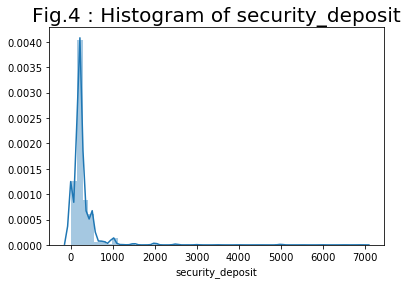

In [17]:
#view histogram for 'security_deposit'
ax=sns.distplot(df['security_deposit'])
ax.set_title('Fig.4 : Histogram of security_deposit', fontsize=20)

In [18]:
#filter dataset to remove outliers
df = df[df['security_deposit']<3000]

Text(0.5, 1.0, 'Fig.5 : Histogram of cleaning_fee')

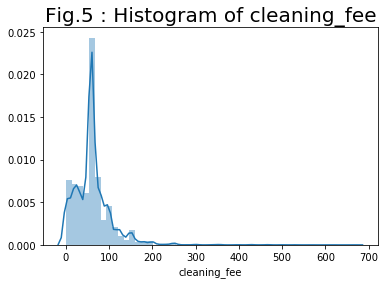

In [19]:
#view histogram of 'cleaning_fee'
ax=sns.distplot(df['cleaning_fee'])
ax.set_title('Fig.5 : Histogram of cleaning_fee', fontsize=20)

In [20]:
#filter dataset to remove outliers
df = df[df['cleaning_fee']<200]

Text(0.5, 1.0, 'Fig.6 : Histogram of price')

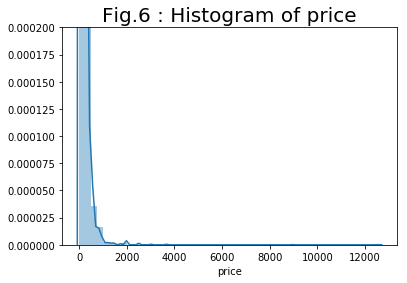

In [21]:
#view histogram of price
ax=sns.distplot(df['price'])
ax.set_ylim([0,0.0002])
ax.set_title('Fig.6 : Histogram of price', fontsize=20)

In [22]:
df = df[df['price']<500]

Text(0.5, 1.0, 'Fig.7 : Histogram of minimum_nights')

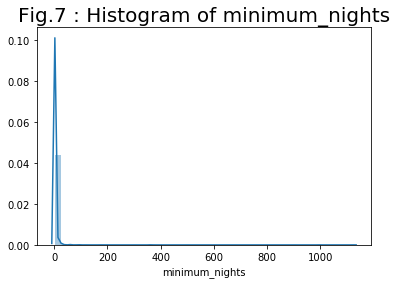

In [23]:
#view histogram of minimum_nights
ax=sns.distplot(df['minimum_nights'])
ax.set_title('Fig.7 : Histogram of minimum_nights', fontsize=20)

In [24]:
#filter dataset to remove outliers
df = df[df['minimum_nights']<200]

For colums with numerical values, we imputed the missing values with 'median'. In case of missing entries in categorical columns, we can drop the respective rows. 

In [25]:
#drop rows with missing values
df.dropna(how='any', inplace=True)
df.shape

(21378, 22)

In [26]:
#check for duplicate rows
df.duplicated().any()

False

In [27]:
#examine df again after addressing for missing entries
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21378 entries, 0 to 22894
Data columns (total 22 columns):
host_since              21378 non-null object
host_response_rate      21378 non-null float64
host_is_superhost       21378 non-null object
suburb                  21378 non-null object
zipcode                 21378 non-null object
latitude                21378 non-null float64
longitude               21378 non-null float64
property_type           21378 non-null object
room_type               21378 non-null object
accommodates            21378 non-null int64
bathrooms               21378 non-null float64
bedrooms                21378 non-null float64
amenities               21378 non-null object
security_deposit        21378 non-null float64
cleaning_fee            21378 non-null float64
price                   21378 non-null int64
number_of_reviews       21378 non-null int64
guests_included         21378 non-null int64
minimum_nights          21378 non-null int64
maximum_nights 

## 2.  Processing Categorical columns
Now we can address and change the type of each column as appropriate.

In [28]:
#examine first five values of 'host_since'
df['host_since'].head()

0     8/21/2009
1     9/16/2009
2    10/31/2009
3     12/3/2009
4    12/22/2009
Name: host_since, dtype: object

In [29]:
#convert 'host_since' column to datetime 
import datetime
df['host_since'] = df['host_since'].astype('datetime64[ns]')

We will examine a few columns with string values and then change their type to 'category' if appropriate.

In [30]:
df['host_is_superhost'].value_counts()

f    16333
t     5045
Name: host_is_superhost, dtype: int64

In [31]:
df['property_type'].value_counts()

Apartment                 11935
House                      5296
Townhouse                  1336
Condominium                 521
Serviced apartment          449
Villa                       272
Guesthouse                  269
Guest suite                 256
Bed and breakfast           253
Loft                        182
Cottage                     155
Bungalow                    147
Other                        45
Cabin                        42
Boutique hotel               33
Hostel                       31
Farm stay                    30
Tiny house                   25
Camper/RV                    16
Aparthotel                   12
Hotel                        11
Earth house                  10
Tent                          9
Boat                          8
Nature lodge                  6
Resort                        6
Barn                          5
Chalet                        4
Castle                        4
Treehouse                     3
Hut                           3
Casa par

The column 'property_type' has too many different types of properties. Majority of them are 'Apartment'. 'Condominium' and 'Serviced apartment' can be clubbed into 'Apartment' bacause they all mean the same thing as far as we are concerned. There are also some 'House' and 'Villa'. All the other types of properties can be clubbed together into 'Other'.

In [32]:
df['property_type'] = df['property_type'].apply(lambda x: 'Apartment' if x in ['Condominium','Serviced apartment'] else x)
df['property_type'] = df['property_type'].apply(lambda x: 'Other' if x not in ['Apartment','House','Townhouse','Villa'] else x)
df['property_type'].value_counts()

Apartment    12905
House         5296
Other         1569
Townhouse     1336
Villa          272
Name: property_type, dtype: int64

In [33]:
df['room_type'].value_counts()

Entire home/apt    13062
Private room        7927
Shared room          389
Name: room_type, dtype: int64

In [34]:
df['amenities'].head()

0    {Internet,Wifi,"Pets live on this property",Do...
1    {TV,Internet,Wifi,"Air conditioning",Kitchen,H...
2    {TV,Internet,Wifi,"Air conditioning",Kitchen,"...
3    {TV,Internet,Wifi,Kitchen,"Free parking on pre...
4    {Internet,Wifi,Heating,Washer,"Smoke detector"...
Name: amenities, dtype: object

The 'amenities' column consists of several amenities all concatenated together in each row. This column will be used in the 'Feature Engineering' step in a later section.

In [35]:
df['cancellation_policy'].value_counts()

strict_14_with_grace_period    8399
flexible                       7247
moderate                       5695
super_strict_30                  26
super_strict_60                  10
strict                            1
Name: cancellation_policy, dtype: int64

We can club together all the values that are not 'moderate' or 'flexible', as 'strict'.

In [36]:
df['cancellation_policy'] = df['cancellation_policy'].apply(lambda x: 'strict' if x not in ['flexible','moderate'] else x)
df['cancellation_policy'].value_counts()

strict      8436
flexible    7247
moderate    5695
Name: cancellation_policy, dtype: int64

In [37]:
#change type of above processed columns to 'category'
categorical_columns =['host_is_superhost', 'property_type','room_type','cancellation_policy']
df[categorical_columns] = df[categorical_columns].astype('category')

## 3.  Feature Engineering

### 3.1. Popularity of suburb
Intuitively, an important factor in determining the price of any listing is the overall rating of the suburb the property is located in. There are 307 suburbs in Melbourne. The rank of each suburb in terms of liveability can be found on [Domain](https://www.domain.com.au/liveable-melbourne/melbournes-most-liveable-suburbs-2019/melbournes-307-suburbs-ranked-for-liveability-2019-898676/), which is a popular real estate website. The data from this website was scraped using Google sheets and csv file called 'suburb_ranking.csv' was created.  

In [38]:
suburbs = pd.read_csv('suburb_ranking.csv', sep='.',header=None,names = ['suburb_rank','suburb'])
suburbs.head()

,suburb_rank,suburb
0,1,South Yarra
1,2,East Melbourne
2,3,Carlton
3,4,Fitzroy North
4,5,Hawthorn


In [39]:
#remove extra whitespace at the beginning of each suburb name
suburbs['suburb'] = suburbs['suburb'].apply(lambda x: x[1:])

In [40]:
#change type of 'suburb' column in df and suburbs dataframes to type 'str'
df['suburb'] = df['suburb'].astype('str')
suburbs['suburb'] = suburbs['suburb'].astype('str')

In [41]:
suburbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 2 columns):
suburb_rank    307 non-null int64
suburb         307 non-null object
dtypes: int64(1), object(1)
memory usage: 4.9+ KB


In [42]:
#merge datasets on 'suburb' column
df_merged = df.merge(suburbs,on='suburb',how='left')
df_merged.head()

,host_since,host_response_rate,host_is_superhost,suburb,zipcode,latitude,longitude,property_type,room_type,accommodates,...,security_deposit,cleaning_fee,price,number_of_reviews,guests_included,minimum_nights,maximum_nights,review_scores_rating,cancellation_policy,suburb_rank
0,2009-08-21,0.0,f,Bulleen,3105,-37.772684,145.092133,House,Private room,2,...,200.0,59.0,60,4,1,1,365,90.0,strict,133.0
1,2009-09-16,100.0,f,Brunswick East,3057,-37.766505,144.980736,Apartment,Private room,2,...,0.0,9.0,35,108,1,3,45,87.0,moderate,44.0
2,2009-10-31,100.0,t,St Kilda,3182,-37.859755,144.977369,Apartment,Entire home/apt,3,...,450.0,100.0,159,15,2,3,28,94.0,strict,26.0
3,2009-12-03,100.0,f,Thornbury,3071,-37.758971,144.989228,House,Private room,1,...,200.0,15.0,50,29,1,2,200,94.0,moderate,84.0
4,2009-12-22,100.0,f,St Kilda East,3183,-37.864530,144.992238,House,Private room,2,...,200.0,15.0,69,63,1,1,90,90.0,moderate,NaN


In [43]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21378 entries, 0 to 21377
Data columns (total 23 columns):
host_since              21378 non-null datetime64[ns]
host_response_rate      21378 non-null float64
host_is_superhost       21378 non-null category
suburb                  21378 non-null object
zipcode                 21378 non-null object
latitude                21378 non-null float64
longitude               21378 non-null float64
property_type           21378 non-null category
room_type               21378 non-null category
accommodates            21378 non-null int64
bathrooms               21378 non-null float64
bedrooms                21378 non-null float64
amenities               21378 non-null object
security_deposit        21378 non-null float64
cleaning_fee            21378 non-null float64
price                   21378 non-null int64
number_of_reviews       21378 non-null int64
guests_included         21378 non-null int64
minimum_nights          21378 non-null int64
m

There are several rows where suburb names do not match, as the suburb names in melbourne airbnb are not accurate. Therefore we can either drop those rows or impute them with an appropriate value. Let's impute a median ranking value.  

In [44]:
#impute missing entries in 'suburb rank' column with meidan rank value
df_merged['suburb_rank'] = df_merged['suburb_rank'].fillna(df_merged['suburb_rank'].median())
df = df_merged

### 3.2. Distance from Melbourne CBD
Another supposedly important feature contributing to the price of any listing is the distance of its location from CBD. We have the latitude and longitude of each listing. using those, we can calculate the distance in km from Melbourne CBD using the following function.

In [45]:
from geopy.distance import great_circle
def distance_to_cbd(lat, lon):
    melbourne_centre = (-37.840935, 144.946457) #coordinates of Melbourne CBD
    accommodation = (lat, lon)
    return great_circle(melbourne_centre, accommodation).km

#add distance column to dataframe
df['distance'] = df.apply(lambda x: distance_to_cbd(x.latitude, x.longitude), axis=1)

### 3.3 Facilities provided
As seen earlier, the 'amenities' column is a concatenation of various amenities providedd by the host. We can list the various types of amenities provided by various hosts and see if there are any unique ones that help us in predicting the price of the property.

In [46]:
from collections import Counter
results = Counter()
df['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

results.most_common(30)

[('Kitchen', 20232),
 ('Essentials', 20223),
 ('Wifi', 19672),
 ('Smoke detector', 19449),
 ('Washer', 19074),
 ('Heating', 18625),
 ('Hangers', 18140),
 ('TV', 17886),
 ('Shampoo', 16421),
 ('Air conditioning', 16126),
 ('Iron', 16057),
 ('Hair dryer', 15995),
 ('Laptop friendly workspace', 15086),
 ('Hot water', 12450),
 ('Dryer', 11125),
 ('Free parking on premises', 10627),
 ('Step-free access', 9760),
 ('Elevator', 8734),
 ('Family/kid friendly', 8658),
 ('Refrigerator', 8478),
 ('Dishes and silverware', 7854),
 ('Microwave', 7850),
 ('Stove', 7660),
 ('Oven', 7547),
 ('Bed linens', 7473),
 ('Long term stays allowed', 7291),
 ('Cooking basics', 7290),
 ('Fire extinguisher', 6940),
 ('First aid kit', 6569),
 ('Dishwasher', 6252)]

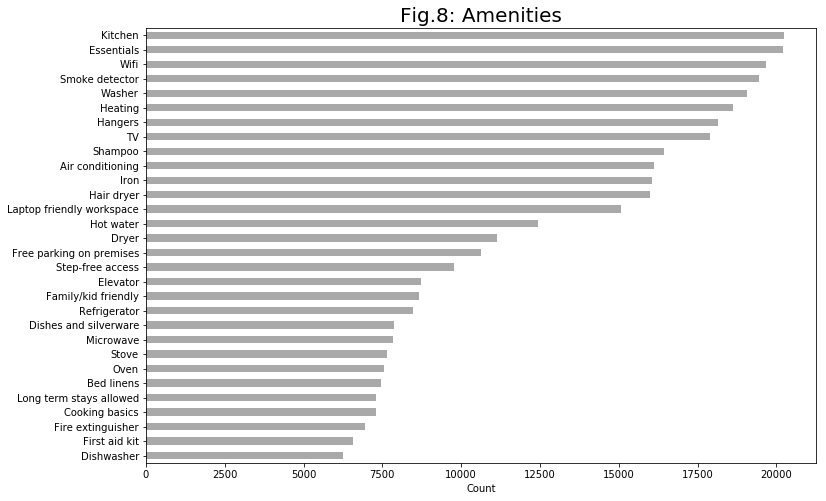

In [47]:
sub_df = pd.DataFrame(results.most_common(30), columns=['amenity', 'count'])
ax = sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(12,8), legend=False, color='darkgrey')
ax.set_title('Fig.8: Amenities', fontsize=20)
ax.set_xlabel('Count')
ax.set_ylabel('');

Most common amenities like 'Kitchen', 'Essentials' etc are provided by almost all the hosts and therefore they may not help us in predicting the price. Similarly, amenities like 'First aid kit', 'Dishwasher' etc are not listed by majority of the hosts, therefore not quite useful. Let us pick 3 amenities from around mid range, that may help us in price prediction. We will confirm the importance of those amenities using box plots in a later section.

In [48]:
#create columns for amenities Air-Condtitioning, Free_Parking and 'Family_kid_friendly'
df['Air_Conditioning'] = df['amenities'].str.contains('Air conditioning')
df['Free_Parking'] = df['amenities'].str.contains('Free parking on premises')
df['Family_kid_friendly'] = df['amenities'].str.contains('Family/kid friendly')

In [49]:
#examine df again after addition of engineered columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21378 entries, 0 to 21377
Data columns (total 27 columns):
host_since              21378 non-null datetime64[ns]
host_response_rate      21378 non-null float64
host_is_superhost       21378 non-null category
suburb                  21378 non-null object
zipcode                 21378 non-null object
latitude                21378 non-null float64
longitude               21378 non-null float64
property_type           21378 non-null category
room_type               21378 non-null category
accommodates            21378 non-null int64
bathrooms               21378 non-null float64
bedrooms                21378 non-null float64
amenities               21378 non-null object
security_deposit        21378 non-null float64
cleaning_fee            21378 non-null float64
price                   21378 non-null int64
number_of_reviews       21378 non-null int64
guests_included         21378 non-null int64
minimum_nights          21378 non-null int64
m

In [50]:
#change type of engineered amenities columns to 'category'
df[['Air_Conditioning','Free_Parking','Family_kid_friendly']] = df[['Air_Conditioning','Free_Parking','Family_kid_friendly']].astype('category')

## 4. Feature Selection
### 4.1 Numerical columns
We can plot a heatmap of all the numerical columns and select those that correlate the most with price.

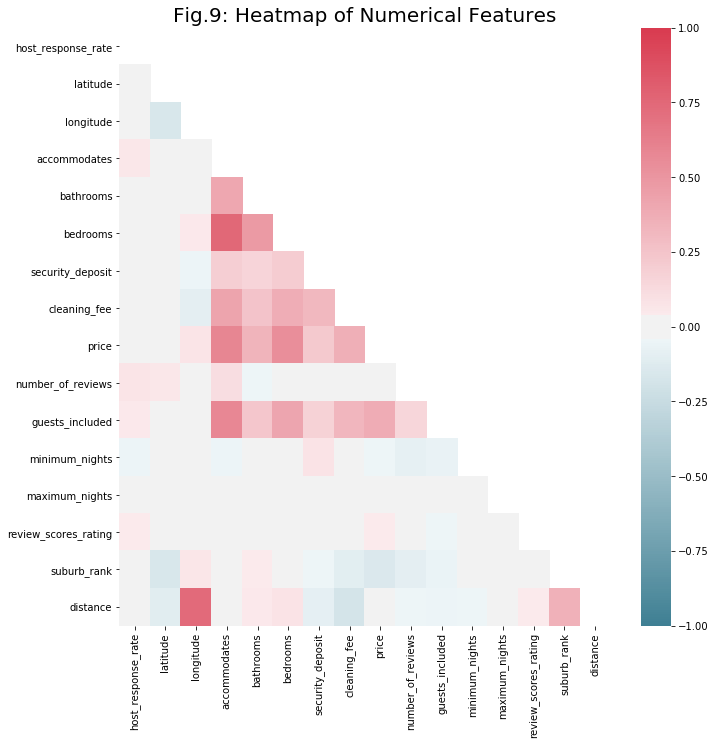

In [51]:
df_num = df.select_dtypes(exclude=['category'])

corr = df_num.corr()

plt.figure(figsize= (11,11))
#create mask to hide repetitive other half of heatmap to make it visually appealing
mask = np.triu(np.ones_like(corr, dtype=np.bool))

#create color map
cmap = sns.diverging_palette(220,8,as_cmap=True)

#plot heatmap
ax = sns.heatmap(corr,cmap=cmap,mask=mask, fmt='.1g',vmin=-1.0,vmax=1.0)
ax.set_title('Fig.9: Heatmap of Numerical Features', fontsize=20);

We will select the top 8 features that have the highest correlation (either positive or negative) with 'price'. 

In [52]:
#find features that correlate most with 'price'
np.abs(corr['price']).sort_values(ascending=False)

price                   1.000000
accommodates            0.592563
bedrooms                0.539093
guests_included         0.378079
cleaning_fee            0.362386
bathrooms               0.340982
security_deposit        0.223754
suburb_rank             0.143975
longitude               0.077155
minimum_nights          0.045750
review_scores_rating    0.042908
number_of_reviews       0.022682
host_response_rate      0.017360
latitude                0.015585
distance                0.014382
maximum_nights          0.002427
Name: price, dtype: float64

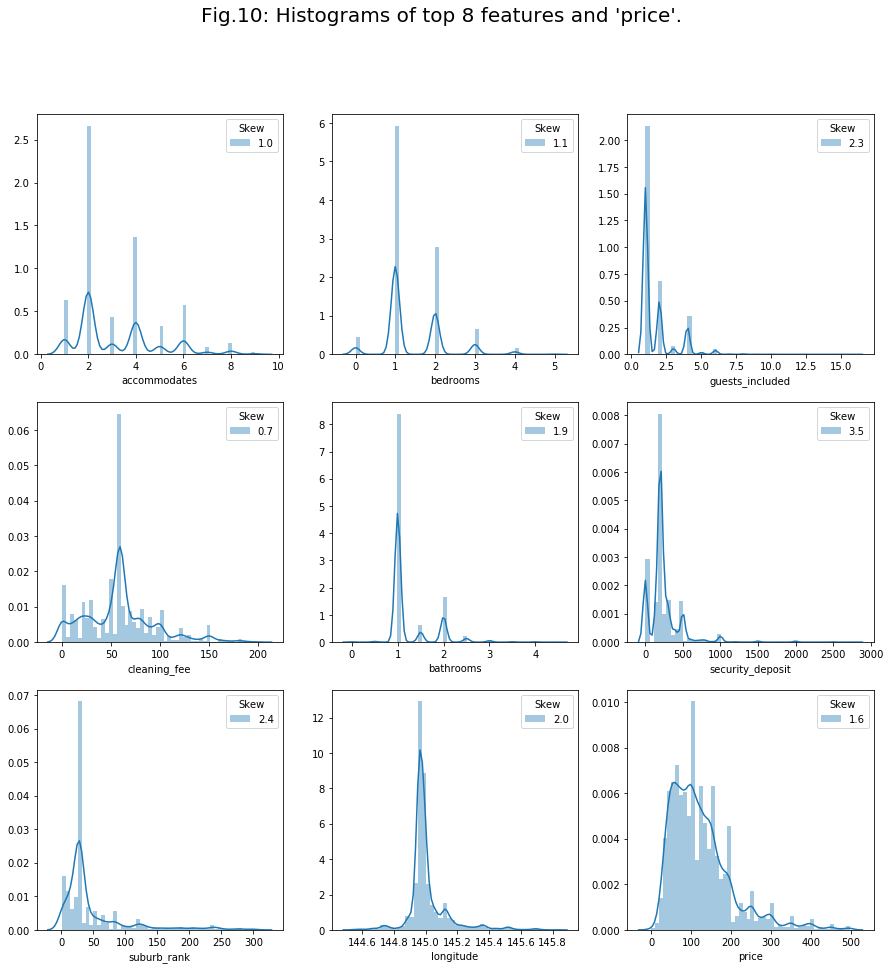

In [53]:
#view histograms of top 8 features that correlate most with price and price column
hist_features = ['accommodates', 'bedrooms','guests_included','cleaning_fee','bathrooms', 'security_deposit','suburb_rank','longitude','price']
subset = df[hist_features]
fig,plot = plt.subplots(3,3,figsize=(15,15))
fig.suptitle("Fig.10: Histograms of top 8 features and 'price'.", fontsize = 20)
counter=0
for r in range(3):
    for c in range(3):
        axes = sns.distplot(subset[hist_features[counter]],ax=plot[r,c],label = round(subset[hist_features[counter]].skew(),1))
        axes.set_xlabel(hist_features[counter],fontsize=10)
        axes.grid(False)
        
        axes.legend(title='Skew')
        
        counter+=1
        if counter==9:
            break


As we can see in Fig.10, the distributions of some features are not normal and are skewed towards the right. This may be problematic with some machine learning algorithms. We can perform feature transformation using sklearn preprocessing and view their distribution after transformation.

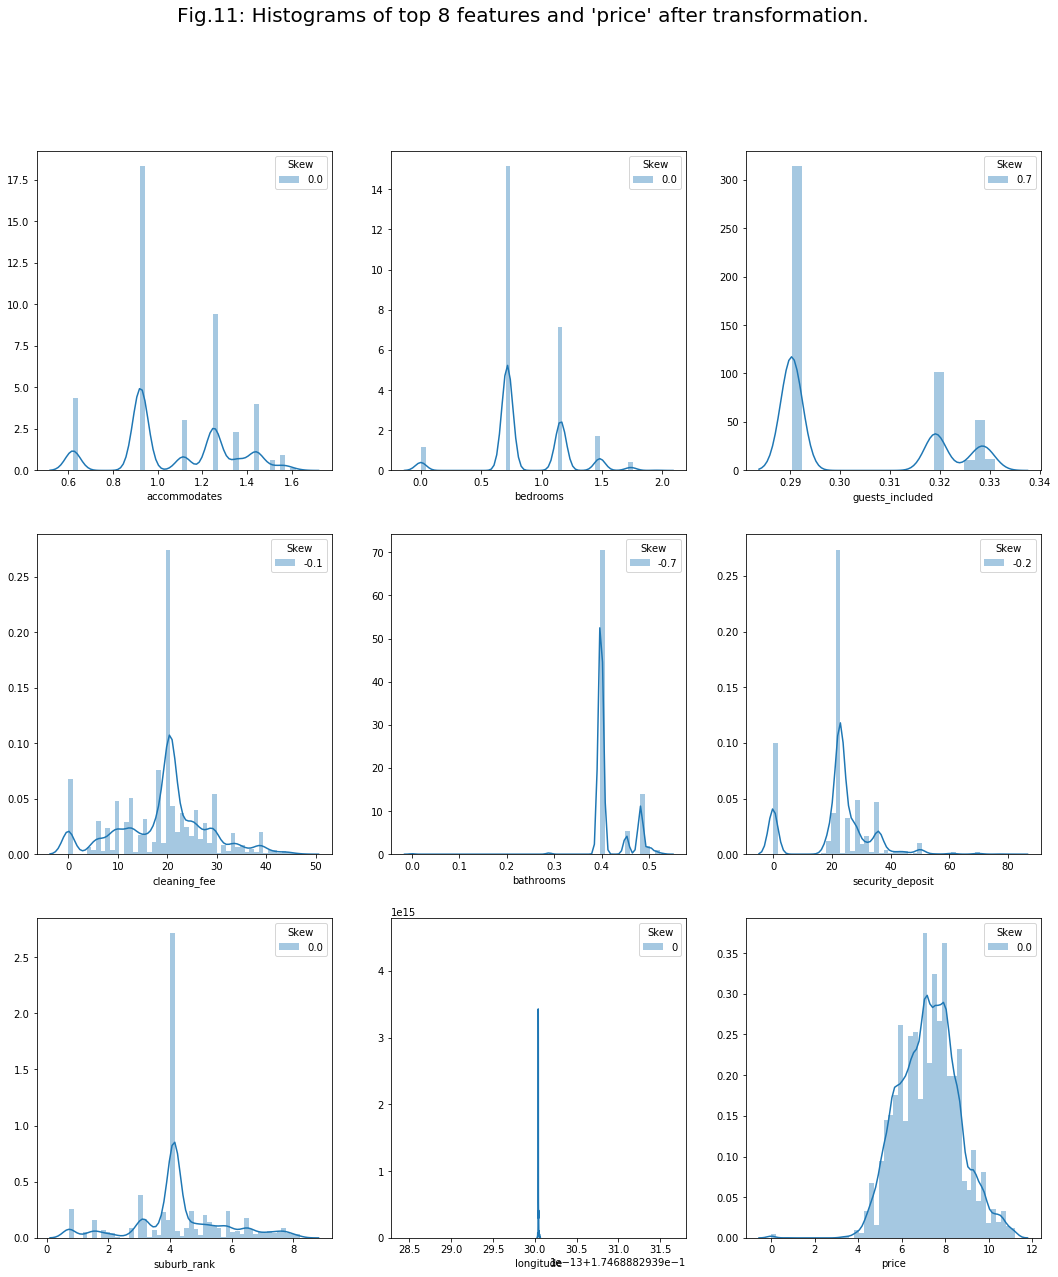

In [54]:
#use sklearn PowerTransformer to transform the skewed distributions
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
transformed_features = pt.fit_transform(subset.values)
transformed_features = pd.DataFrame(transformed_features, columns = hist_features)
fig,plot = plt.subplots(3,3,figsize=(18,20))
fig.suptitle("Fig.11: Histograms of top 8 features and 'price' after transformation.", fontsize = 20)

counter=0
for r in range(3):
    for c in range(3):
        axes = sns.distplot(transformed_features[hist_features[counter]],ax=plot[r,c],label = round(transformed_features[hist_features[counter]].skew(),1))
        axes.set_xlabel(hist_features[counter],fontsize=10)
        axes.grid(False)
        
        axes.legend(title='Skew')
        
        counter+=1
        if counter==9:
            break

There is a significant reduction of skewness. The Skew values after transformation are all in the range of -1 to 1 which is an acceptable range for most machine learning algorithms. Therefore, we can incorporate this transformation step in the machine learning pipeline (depending upon algorithm requirements) when we build prediction models.

### 4.2  Categorical Columns

We had some categorical columns in the original dataset and we also engineered a few. To perform feature selection, we can view box plots of each categorical feature and see its influence on price.

In [55]:
df_cat = df.select_dtypes(include='category')
cat_features = df_cat.columns.tolist()
df_cat.loc[:,'price'] = df.loc[:,'price']
cat_features

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['host_is_superhost',
 'property_type',
 'room_type',
 'cancellation_policy',
 'Air_Conditioning',
 'Free_Parking',
 'Family_kid_friendly']

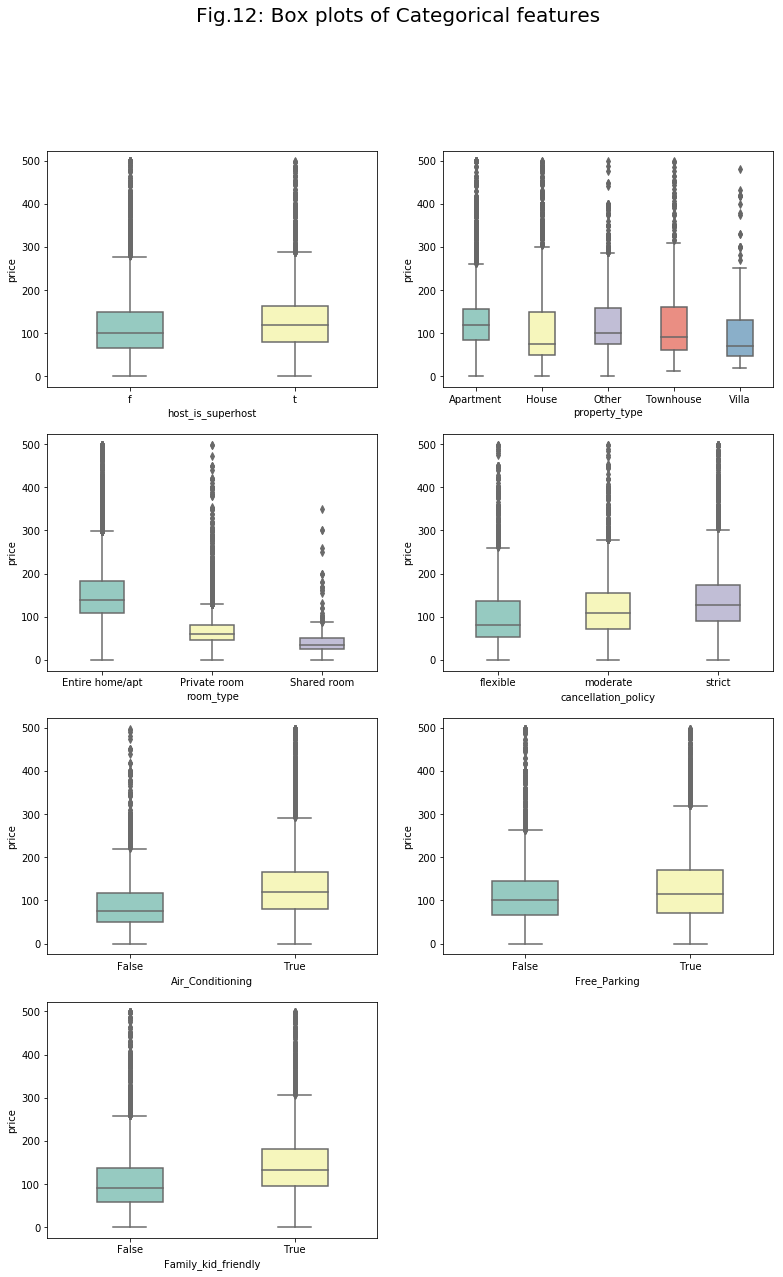

In [56]:
fig,plots = plt.subplots(4,2, figsize=(13,20))
fig.suptitle("Fig.12: Box plots of Categorical features", fontsize = 20)
fig.delaxes(plots[3][1])
counter=0
for r in range(4):
    for c in range(2):
        axes = sns.boxplot(x=cat_features[counter], y='price', width=0.4,data=df_cat,ax=plots[r,c],palette=sns.color_palette("Set3"))
        counter+=1
        if counter==7:
            break
        

All the above categorical features have an influence on price to some extent, therefore we will include them all in our final dataset. 

In [57]:
#perform one-hot encoding for categorical features
categorical_features = df.select_dtypes(include='category')
categorical_features = pd.get_dummies(categorical_features,drop_first=True)

#create final preprocessed dataframe to be used for building prediction models 
numerical_features = df[['accommodates', 'bedrooms','guests_included','bathrooms','cleaning_fee','security_deposit','longitude','suburb_rank','price']]
melbourne_airbnb = pd.concat([numerical_features,categorical_features],axis=1)

In [58]:
#check shape of final preprocessed dataframe
melbourne_airbnb.shape

(21378, 21)

In [59]:
#save dataframe as csv file
melbourne_airbnb.to_csv('melbourne-airbnb.csv',index=False)